In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [40]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Anshu\.cache\kagglehub\datasets\uciml\sms-spam-collection-dataset\versions\1


In [42]:
data = pd.read_csv("spam.csv",encoding="latin")

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [44]:
data.shape

(5572, 5)

In [45]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [46]:
data = data[["v1","v2"]]
data.columns = ['label', 'message']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
data["label"] = data["label"].astype(int)

X = data["message"]
y = data["label"]

In [47]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


C:\Users\Anshu\AppData\Local\Temp\ipykernel_12452\1074502854.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])


Text(0.5, 1.0, 'Distribution of Spam and Not Spam Messages')

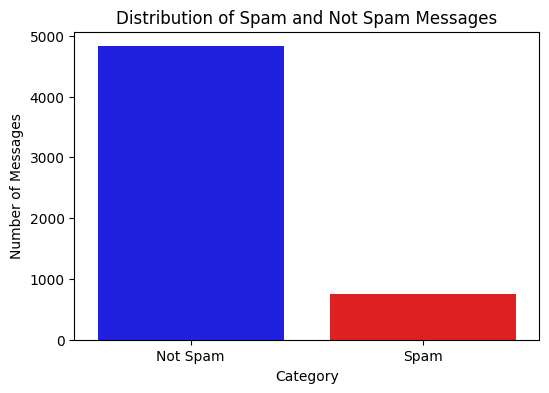

In [48]:
# Count the number of messages in each class
class_counts = data["label"].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])

# Add labels and title
plt.xticks(ticks=[0, 1], labels=["Not Spam", "Spam"])
plt.ylabel("Number of Messages")
plt.xlabel("Category")
plt.title("Distribution of Spam and Not Spam Messages")


In [49]:

vectorizer = TfidfVectorizer()
X_tfidata = vectorizer.fit_transform(X)

# Apply oversampling **after vectorization**
oversampler = RandomOverSampler(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_tfidata, y)



C:\Users\Anshu\AppData\Local\Temp\ipykernel_12452\3554763218.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])


Text(0.5, 1.0, 'Distribution of Spam and Not Spam Messages after Apply oversampling')

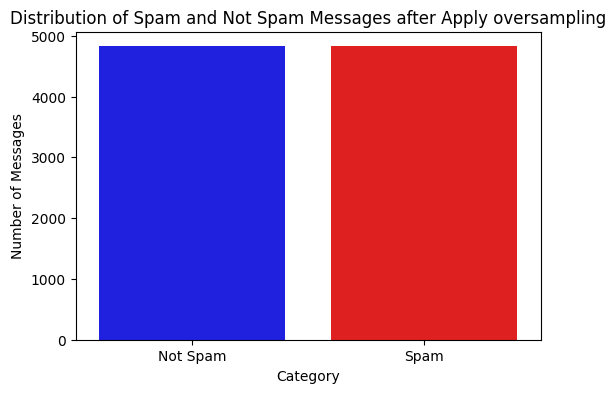

In [50]:
# Count the number of messages in each class
class_counts = y_resampled.value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])

# Add labels and title
plt.xticks(ticks=[0, 1], labels=["Not Spam", "Spam"])
plt.ylabel("Number of Messages")
plt.xlabel("Category")
plt.title("Distribution of Spam and Not Spam Messages after Apply oversampling")


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [52]:
model = MultinomialNB()

In [53]:
model.fit(X_train, y_train)

MultinomialNB()

In [54]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)

In [55]:
print(f"accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

accuracy: 98.07%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1454
           1       0.98      0.98      0.98      1441

    accuracy                           0.98      2895
   macro avg       0.98      0.98      0.98      2895
weighted avg       0.98      0.98      0.98      2895



In [56]:
sample_messages = [
    "Congratulations! You have won a free iPhone. Click here to claim now!",  # Spam
    "Hey, are we still meeting for coffee tomorrow?",  # Not Spam
    "URGENT! Your bank account is compromised. Call this number now!",  # Spam
    "Don't forget about the project deadline next week.",  # Not Spam
    "WIN a brand new car! Text WIN to 12345 now!"  # Spam
]

sample_messages_vectorized = vectorizer.transform(sample_messages)

new_predictions = model.predict(sample_messages_vectorized)

label_mapping = {0: 'not spam', 1: 'spam'}

mapped_predictions = [label_mapping[pred] for pred in new_predictions]
print("messages:")
print(*sample_messages, sep="\n")
print()
print("Predictions for new messages:", mapped_predictions)

messages:
Congratulations! You have won a free iPhone. Click here to claim now!
Hey, are we still meeting for coffee tomorrow?
URGENT! Your bank account is compromised. Call this number now!
Don't forget about the project deadline next week.
WIN a brand new car! Text WIN to 12345 now!

Predictions for new messages: ['spam', 'not spam', 'spam', 'not spam', 'spam']


In [57]:
import joblib

joblib.dump(model, 'multinomial_nb_model.pkl')
joblib.dump(vectorizer, 'tfidata_vectorizer.pkl')

['tfidata_vectorizer.pkl']